<div style="border:solid green 2px; padding: 20px">
<b>Дмитрий, привет!</b>

Меня зовут Евгений, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

# 1. Подготовка данных

In [1]:
# блок импорта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Подготовка моделей
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# прочитаем данные файла
df = pd.read_csv('/datasets/Churn.csv')

# посмотрим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
# Посмотрим на данные
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


### Сразу бросаются в глаза нюансы

    - Пустые значения в количестве недвижимости у клиента Tenure (скорее всего, означает ее отсутствие)
    - Также Tenure стоит привести к целочисленному типу
    - Столбцы RowNumber и CustomerId нам точно не понадобятся. Фамилия тоже, хотя на будущее можно было бы попробовать поискать любопытные взаимосвязи (в духе, если фамилия типично европейская, то...). Сейчас просто удалим.
    - Количественные признаки Gender и Geography нужно будет преобразовать к числовым значениям

In [4]:
# Удалим лишние признаки
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

    Дополнительно исследовал Tenure, чтобы понять, корректно ли их заполнять нулями. Для этого
    - Посмотрел среднее значение признаков по выборке (только пустые значения) и по всем данным. Т.е. гипотеза, что эти люди меньше зарабатывают или отличаются по другим параметрам, не подтвердилась
    - Построил матрицу корреляции. Опять же, самая высокая корреляция с HasCrCard. С остальными признаками корреляция минимальна.

    Таким образом, мы не можем однозначно утверждать, что пропущенные значения в реальности нули, однако и каких-то дополнительных якорей, чтобы заполнить их приближено к реальности у нас нет.

    В связи с этим, в дальнейшем попробую заполнить нулями. Если результаты не будут устраивать, попробую удалить значения из выборки.

In [5]:
# Заполним значения Tenure и приведем к int'у
df['Tenure'].fillna(0, inplace=True)
df['Tenure'] = df['Tenure'].astype('int')

# Посмотрим, что получилось
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
    
Лучше всего переопределять переменные. 
    
</div>

### Разберемся с категориальными признаками

In [6]:
# Проверим, что полов у нас всего два (мало ли)
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
# Посмотрим сколько у нас стран
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
# Т.к. полов всего два, достаточно заменить признак на 1-0,
# но в целом OHE при удалении столбца даст тот же эффект, поэтому используем прямое кодирование
# также малое количество стран позволяет им обойтись
# к тому же OHE подойдет для всех трех моделей, поэтому остановимся на нем

df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [9]:
# Мы имеем явно большой масштаб числовых признаков, стандартизируем их

# Поначалу пробовал делать сразу fit_transform на весь набор, но на консультации сказали, что так лучше не делать
# поэтому сперва разобьем нашу выборку на тестовую и валидационную

# Для начала отделим целевой признак

target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

# Определим random_state для всего проекта
RANDOM_STATE = 12345

# поскольку спрятанной тестовой выборки нет, поделим наш датасет на три в пропорции 60-20-20
# сначала отделим набор на котором будем тренировать
features_train, df_valid_ant_test_features, target_train, df_valid_ant_test_target = train_test_split(
    features, target, test_size=0.4, random_state=RANDOM_STATE)

# теперь разделим тестовую выборку от валидационной
features_valid, features_test, target_valid, target_test = train_test_split(
    df_valid_ant_test_features, df_valid_ant_test_target, test_size=0.5, random_state=RANDOM_STATE)

del df_valid_ant_test_features, df_valid_ant_test_target

# Проверим, что получилось
print('Target test count = {}, Varget test count = {}, Train test count = {}'.format(target_test.count(), target_valid.count(), target_train.count()))

Target test count = 2000, Varget test count = 2000, Train test count = 6000


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Отлично. Выборку поделили корректно. 
    
</div>

In [10]:
# Стандартизируем признаки
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler.fit(features_train[numeric])

pd.set_option('mode.chained_assignment', None)
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# посмотрим на тренировочной выборке что получилось
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,-1.073677,-0.752805,-0.182016,-1.233163,0.830152,0,1,-1.278361,0,0,1
4094,-1.447531,-0.942612,1.748053,-1.233163,0.830152,0,1,-1.281307,0,0,1
3492,0.027113,0.575842,-1.468729,-0.310229,-0.891560,0,1,-0.903158,0,0,0
2177,0.151731,-1.417129,-0.182016,-1.233163,0.830152,0,1,-1.128539,0,0,0


### Промежуточный вывод

    - Мы изучили данные, заполнили пропуски, привели типы к соответствующим значениям
    - Удалили признаки, которые нам вряд ли бы чем-то помогли
    - Посредством One-Hot Encoding преобразовали категориальные признаки в числовые
    - Привели числовые признаки к одному масштабу

    По итогу, мы подготовили данные для дальнейшего исследования

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Хорошо, что нормализуем наши данные.
    
---
    
В том числе я бы рекомендовал построить графики распределения наших данных, чтобы поверхностно понимать с чем мы имеем дело.

И посмотреть на матрицу корреляции, ведь у нас могут быть признаки, которые сильно коррелируют с таргет перменной, а это может отрицательно сказаться на нашей моделе. Хотел бы отметить, что так бывает не постоянно и эти способы стоит тестировать.
    
</div>

# 2. Исследование задачи

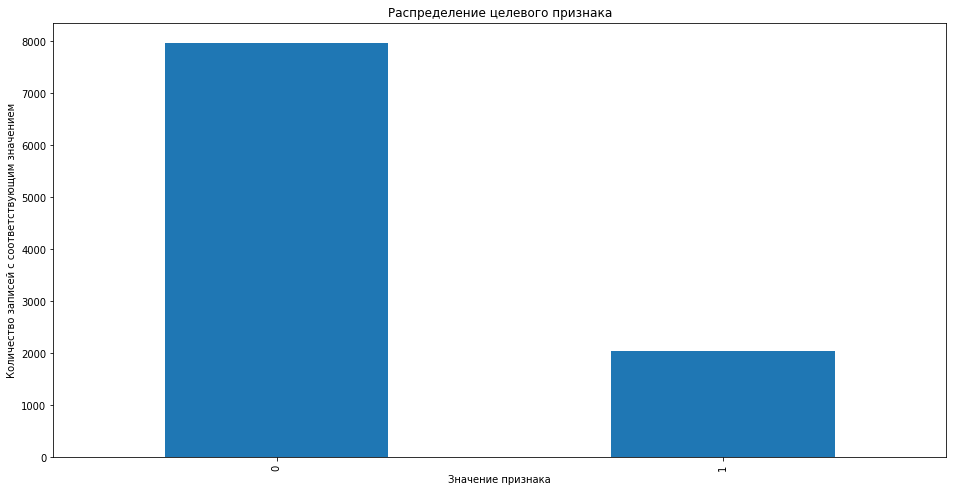

In [11]:
# Посмотрим на распределение значений целевого признака
fig, ax = plt.subplots(1)
ax.set_title('Распределение целевого признака')
ax.set_xlabel('Значение признака')
ax.set_ylabel('Количество записей с соответствующим значением')
target.value_counts().plot(kind='bar', figsize=(16,8), ax=ax)

    Очевидно, что имеем существенный перекос в данных в пользу тех, кто еще не прекратил отношения с банком. Для наших моделей это может быть не круто, но пока попробуем поработать с тем, что есть.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Хорошо, что посмотрели на дисбаланс классов.    
</div>

In [12]:
# Поскольку мы все равно будем исследовать все метрики, а они имеют одинаковую сигнатуру,
# имеет смысл объеденить вывод в одну функцию, чтобы сразу получать все интересующие данные

def print_full_scrore_info_title():
    print('|{: >9}|{: >9}|{: >9}|{: >9}|{: >9}|{: >7}|{: >7}|{: >7}|{: >7}|'.format('Accuracy', 'Recall', 'Precision', 'F1', 'ROC-AUC', 'TP', 'TN', 'FP', 'FN'))

def print_full_score_info(target, predicted):
    accuracy = accuracy_score(target, predicted)
    recall = recall_score(target, predicted)
    precision = precision_score(target, predicted)
    f1 = f1_score(target, predicted)
    roc_auc = roc_auc_score(target, predicted)
    
    confusion_m = confusion_matrix(target, predicted);
    TN = confusion_m[0][0]
    TP = confusion_m[1][1]
    FN = confusion_m[1][0]
    FP = confusion_m[0][1]
    
    print('|{: >9.7f}|{: >9.7f}|{: >9.7f}|{: >9.7f}|{: >9.7f}|{: >7}|{: >7}|{: >7}|{: >7}|'.format(accuracy, recall, precision, f1, roc_auc, TP, TN, FP, FN))

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Интересные способы 👍
    
</div>

In [13]:
# Изучим модели без учета дисбаланса
# Начнем с дерева решений

# определим глобальный массив, где будем сохранять наши лучшие результаты
best_results = dict()
best_results['decision_tree'] = dict()
best_results['logistic_regression'] = dict()
best_results['random_forest'] = dict()

# напишем функцию по выводу информации по нашей модели
def check_decision_tree(features_train, target_train, class_weight, train_type):
    print('Decision tree')
    print('|{: >9}'.format('max_depth'), end='')
    print_full_scrore_info_title()
    
    # будем сразу считать лучшую меру и параметры, чтобы не искать глазами
    best_f1 = 0
    best_max_depth = 0
    for max_depth in range(2, 11, 1):
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=RANDOM_STATE, class_weight=class_weight)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        print('|{: >9}'.format(max_depth), end='')
        print_full_score_info(target_valid, predicted_valid)
        
        current_f1 = f1_score(target_valid, predicted_valid)
        if (current_f1 > best_f1):
            best_f1 = current_f1
            best_max_depth = max_depth
    
    # воспользуемся тем, что питон будет искать наш словарь глобально
    best_results['decision_tree'][train_type] = dict()
    best_results['decision_tree'][train_type]['params'] = 'max_depth=' + str(best_max_depth)
    best_results['decision_tree'][train_type]['f1'] = best_f1

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Здоров, что создали функцию для проверки нашей модели.   
</div>

In [14]:
# исследуем дерево решений

check_decision_tree(features_train, target_train, None, 'default')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|        2|0.8240000|0.4593301|0.6037736|0.5217391|0.6898421|    192|   1456|    126|    226|
|        3|0.8380000|0.2846890|0.8263889|0.4234875|0.6344431|    119|   1557|     25|    299|
|        4|0.8520000|0.4377990|0.7500000|0.5528701|0.6996201|    183|   1521|     61|    235|
|        5|0.8530000|0.4138756|0.7792793|0.5406250|0.6914511|    173|   1533|     49|    245|
|        6|0.8580000|0.4497608|0.7768595|0.5696970|0.7078134|    188|   1528|     54|    230|
|        7|0.8505000|0.4066986|0.7692308|0.5320814|0.6872304|    170|   1531|     51|    248|
|        8|0.8505000|0.4282297|0.7489540|0.5449011|0.6951515|    179|   1522|     60|    239|
|        9|0.8500000|0.4928230|0.7006803|0.5786517|0.7185986|    206|   1494|     88|    212|
|       10|0.8335000|0.4473684|0.6470588|0.5289958|0.6914465|    187|   1480|    102|    231|


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Кайф 😊
    
В том числе эти данные можно было поместить в датафрейм и показать его соответственно. 
    
</div>

In [15]:
# Посмотрим на регрессию

def check_logistic_regression(features_train, target_train, class_weight, train_type):
    print('Logistic regression')
    print_full_scrore_info_title()
    
    model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight=class_weight)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print_full_score_info(target_valid, predicted_valid)
    
    # воспользуемся тем, что питон будет искать наш словарь глобально
    best_results['logistic_regression'][train_type] = dict()
    best_results['logistic_regression'][train_type]['params'] = '-'
    best_results['logistic_regression'][train_type]['f1'] = f1_score(target_valid, predicted_valid)
    
check_logistic_regression(features_train, target_train, None, 'default')

Logistic regression
| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|0.8025000|0.2368421|0.5657143|0.3338954|0.5944008|     99|   1506|     76|    319|


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

В том числе можно было попробвать и сравнить параметр `C` у логистической регрессии. 
        
</div>

In [16]:
# исследуем случайный лес

def check_random_forest(features_train, target_train, class_weight, train_type):
    print('Decision tree')
    print('|{: >12}|{: >9}|'.format('n_estimators', 'max_depth'), end='')
    print_full_scrore_info_title()
    print()
    
    # будем сразу считать лучшую меру и параметры, чтобы не искать глазами
    best_f1 = 0
    best_max_depth = 0
    best_n_estimators = 0
    
    for estim in range(5, 26, 5):
        for max_depth in range(5, 26, 5):
            model = RandomForestClassifier(n_estimators=estim, max_depth=max_depth, random_state=RANDOM_STATE, class_weight=class_weight)
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            print('|{: >12}|{: >9}|'.format(estim, max_depth), end='')
            print_full_score_info(target_valid, predicted_valid)
            
            f1 = f1_score(target_valid, predicted_valid)
            if (f1 > best_f1):
                best_f1 = f1
                best_max_depth = max_depth
                best_n_estimators = estim
        
        print() # для разделения вывода по количеству деревьев
    
    # воспользуемся тем, что питон будет искать наш словарь глобально
    best_results['random_forest'][train_type] = dict()
    best_results['random_forest'][train_type]['params'] = 'estim=' + str(best_n_estimators) + '; max_depth=' + str(best_max_depth)
    best_results['random_forest'][train_type]['f1'] = best_f1
        
check_random_forest(features_train, target_train, None, 'default')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|

|           5|        5||0.8515000|0.3684211|0.8235294|0.5090909|0.6737807|    154|   1549|     33|    264|
|           5|       10||0.8540000|0.4545455|0.7480315|0.5654762|0.7070452|    190|   1518|     64|    228|
|           5|       15||0.8445000|0.5143541|0.6656347|0.5802969|0.7230430|    215|   1474|    108|    203|
|           5|       20||0.8385000|0.4904306|0.6507937|0.5593452|0.7104492|    205|   1472|    110|    213|
|           5|       25||0.8380000|0.4641148|0.6598639|0.5449438|0.7004519|    194|   1482|    100|    224|

|          10|        5||0.8450000|0.3325359|0.8176471|0.4727891|0.6564702|    139|   1551|     31|    279|
|          10|       10||0.8595000|0.4521531|0.7842324|0.5735964|0.7096417|    189|   1530|     52|    229|
|          10|       15||0.8545000|0.4880383|0.7259786|0.5836910|0.7196829|    204|   1505|     77|    214|
|          1

### Промежуточный вывод

    1. В текущем виде нам никак не удастся достигнуть F1-меры выше 0,59
    2. Все модели неплохо предсказывают негативные исходы, но ошибаются в половине или более случаев при предсказывании положительного исхода 
    3. Лучший результат по F1 мере показал случайный лес
    4. В целом результат случайного леса сопоставим с деревом решений - имеем относительно высокую точность при полноте ниже среднего
    5. Худший результат показала регрессия, результат не был ни точным, ни полным.
    6. При этом да, accuracy во всех случаях выглядит очень аппетитно и... бесполезно

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Хорошо, что используем вложенные циклы для перебора гиперпараметров. 
    
---

Кстати для автоматического перебора параметров мы можем использовать готовый метод `GreadSearchCV` в библиотеке `sklearn`. 
    
---
    
Для случайного леса я бы рекомедновал взять количество деревьев до 100 (включительно) это приемлемый гиперпараметр для этой модели. 

</div>

# 3. Борьба с дисбалансом

### Взвешивание классов

In [17]:
# Для начала проверим чего мы сможем добиться путем простого взвешивания классов
# Начнем с дерева решений

check_decision_tree(features_train, target_train, 'balanced', 'balanced')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|        2|0.7650000|0.6626794|0.4570957|0.5410156|0.7273574|    277|   1253|    329|    141|
|        3|0.7650000|0.6626794|0.4570957|0.5410156|0.7273574|    277|   1253|    329|    141|
|        4|0.7110000|0.7727273|0.4007444|0.5277778|0.7337088|    323|   1099|    483|     95|
|        5|0.8105000|0.6698565|0.5374280|0.5963791|0.7587588|    280|   1341|    241|    138|
|        6|0.7665000|0.7057416|0.4616588|0.5581835|0.7441477|    295|   1238|    344|    123|
|        7|0.7780000|0.6650718|0.4776632|0.5560000|0.7364550|    278|   1278|    304|    140|
|        8|0.7640000|0.6602871|0.4554455|0.5390625|0.7258452|    276|   1252|    330|    142|
|        9|0.7610000|0.6459330|0.4500000|0.5304519|0.7186682|    270|   1252|    330|    148|
|       10|0.7500000|0.6363636|0.4332248|0.5155039|0.7081945|    266|   1234|    348|    152|


**Из любопытного**

    - Нет просадки на уровне 3, что была до этого
    - Лучший F1 получили на 5м уровне (0.5963791) и уже удалось перейти порог
    - Мы улучшили F1, модель стала получше искать положительные ответы и нам даже удалось добиться порогового значения

In [18]:
# Посмотрим, как дела с логистической регрессией

check_logistic_regression(features_train, target_train, 'balanced', 'balanced')

Logistic regression
| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|0.7010000|0.6842105|0.3803191|0.4888889|0.6948233|    286|   1116|    466|    132|


**Из любопытного**

    - Ощутимо улучшилась полнота, но также ощутимо упала точность
    - F1 по прежнему имеет плохой результат и далеко от целевого признака

In [19]:
# Смотрим, как дела обстоят со случайным лесом

check_random_forest(features_train, target_train, 'balanced', 'balanced')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|

|           5|        5||0.7665000|0.7368421|0.4631579|0.5687904|0.7555892|    308|   1225|    357|    110|
|           5|       10||0.8265000|0.6435407|0.5760171|0.6079096|0.7591913|    269|   1384|    198|    149|
|           5|       15||0.8345000|0.5000000|0.6314199|0.5580774|0.7114412|    209|   1460|    122|    209|
|           5|       20||0.8380000|0.4641148|0.6598639|0.5449438|0.7004519|    194|   1482|    100|    224|
|           5|       25||0.8410000|0.4521531|0.6798561|0.5431034|0.6979476|    189|   1493|     89|    229|

|          10|        5||0.7965000|0.7248804|0.5092437|0.5982231|0.7701519|    303|   1290|    292|    115|
|          10|       10||0.8305000|0.6291866|0.5883669|0.6080925|0.7564391|    263|   1398|    184|    155|
|          10|       15||0.8500000|0.4808612|0.7077465|0.5726496|0.7141980|    201|   1499|     83|    217|
|          1

### Промежуточный вывод по взвешиванию классов

    1. Имеем хорошую точность, но посредственную полноту (за редким исключением)
    2. Также добились нужного значения F1 меры, при чем, как в дереве решений, так и в случайном лесе. Лес победил
    2. Что интересно, увеличение глубины деревьев повышает точность, но снижает полноту
    3. В целом сравнительный результат моделей с взвешиванием и без него неизменился - логистическая регрессия также на последнем месте, дерево решений показывает относительно неплохой, но недостаточный результат.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Отлично, случайный лес победил в схватке моделей.     
</div>

### Upsampling

In [20]:
# Не будем останавливаться на достигнутом, попробуем upsampling

# поскольку модели лучше учатся при соотношении 50 на 50, для начала вычислим коэффицент
# насколько больше у нас отрицательных значений

coef = target[target == 1].count() / target[target == 0].count()
coef

0.25580811252040686

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Логичный способ, здорово что посчитали долю положительного класса.     
</div>

In [21]:
# напишем функцию, которая будет увеличивать нашу выборку с учетом коэффицента

def upsample(features, target, coef):
    if (coef > 1):
        print('Положительных значений больше чем отрицательных, увеличение не требуется')
        print(coef)
        return;
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    repeat = round(1 / coef)
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, coef)

In [22]:
# Проверим, что выборки поменялись
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

In [23]:
# Проверим, что стало с деревом решений

check_decision_tree(features_upsampled, target_upsampled, None, 'upsample')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|        2|0.7650000|0.6626794|0.4570957|0.5410156|0.7273574|    277|   1253|    329|    141|
|        3|0.7650000|0.6626794|0.4570957|0.5410156|0.7273574|    277|   1253|    329|    141|
|        4|0.7110000|0.7727273|0.4007444|0.5277778|0.7337088|    323|   1099|    483|     95|
|        5|0.8105000|0.6698565|0.5374280|0.5963791|0.7587588|    280|   1341|    241|    138|
|        6|0.7665000|0.7057416|0.4616588|0.5581835|0.7441477|    295|   1238|    344|    123|
|        7|0.7790000|0.6650718|0.4793103|0.5571142|0.7370871|    278|   1280|    302|    140|
|        8|0.7645000|0.6578947|0.4560531|0.5386876|0.7252811|    275|   1254|    328|    143|
|        9|0.7610000|0.6459330|0.4500000|0.5304519|0.7186682|    270|   1252|    330|    148|
|       10|0.7540000|0.6435407|0.4395425|0.5223301|0.7133633|    269|   1239|    343|    149|


Удивительно, но мы получили почти те же результаты, что и при использовании `class_weight='balanced'`

In [24]:
# Проверим логистическую регрессию
check_logistic_regression(features_upsampled, target_upsampled, None, 'upsample')

Logistic regression
| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|0.7010000|0.6842105|0.3803191|0.4888889|0.6948233|    286|   1116|    466|    132|


    Тут очень похожая ситуация - результат получился немногим лучше использования `class_weight='balanced'`

In [25]:
# Проверим случайный лес

check_random_forest(features_upsampled, target_upsampled, None, 'upsample')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|

|           5|        5||0.7890000|0.7224880|0.4967105|0.5886940|0.7645310|    302|   1276|    306|    116|
|           5|       10||0.8000000|0.6770335|0.5164234|0.5859213|0.7547620|    283|   1317|    265|    135|
|           5|       15||0.8210000|0.6052632|0.5672646|0.5856481|0.7416328|    253|   1389|    193|    165|
|           5|       20||0.8200000|0.5574163|0.5710784|0.5641646|0.7233984|    233|   1407|    175|    185|
|           5|       25||0.8235000|0.5550239|0.5814536|0.5679315|0.7247307|    232|   1415|    167|    186|

|          10|        5||0.7965000|0.7392344|0.5090610|0.6029268|0.7754326|    309|   1284|    298|    109|
|          10|       10||0.8130000|0.6650718|0.5429688|0.5978495|0.7585789|    278|   1348|    234|    140|
|          10|       15||0.8370000|0.5669856|0.6204188|0.5925000|0.7376648|    237|   1437|    145|    181|
|          1

    А вот для случайного леса результат удалось неплохо улучшить

#### Промежуточный вывод

    Применение апсемплинга не сказалось существенно на результате работы Дерева решений и логистической регресии.
    А вот для случайного леса эффект можно считать ощутимым - на этот раз снизилась точность, но мы имеем весьма неплохое значение полноты.
    При чем, если исходить из задачи - полнота для нас является более важным признаком.

### Downsampling

In [26]:
# Попробуем downsampling

def downsample(features, target, coef):
    fraction = coef;
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, coef)

# проверим, что выборки примерно совпадают
target_downsampled.value_counts()

0    1229
1    1196
Name: Exited, dtype: int64

In [27]:
# Проверим решающее дерево

check_decision_tree(features_downsampled, target_downsampled, None, 'downsample')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|        2|0.7490000|0.7033493|0.4375000|0.5394495|0.7322056|    294|   1204|    378|    124|
|        3|0.7680000|0.6937799|0.4632588|0.5555556|0.7406953|    290|   1246|    336|    128|
|        4|0.7205000|0.7727273|0.4104193|0.5360996|0.7397138|    323|   1118|    464|     95|
|        5|0.7735000|0.7272727|0.4727838|0.5730443|0.7564935|    304|   1243|    339|    114|
|        6|0.7550000|0.7894737|0.4508197|0.5739130|0.7676825|    330|   1180|    402|     88|
|        7|0.7435000|0.7248804|0.4322397|0.5415550|0.7366501|    303|   1184|    398|    115|
|        8|0.7490000|0.6937799|0.4367470|0.5360444|0.7286851|    290|   1208|    374|    128|
|        9|0.7475000|0.6913876|0.4345865|0.5337027|0.7268569|    289|   1206|    376|    129|
|       10|0.7270000|0.7009569|0.4103641|0.5176678|0.7174191|    293|   1161|    421|    125|


In [28]:
# Проверим линейную регрессию

check_logistic_regression(features_downsampled, target_downsampled, None, 'downsample')

Logistic regression
| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|0.7080000|0.6698565|0.3856749|0.4895105|0.6939674|    280|   1136|    446|    138|


    - Логистическая регрессия по прежнему показывает худший результат

In [29]:
# Проверим случайный лес

check_random_forest(features_downsampled, target_downsampled, None, 'downsample')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|

|           5|        5||0.7845000|0.7224880|0.4894652|0.5835749|0.7616865|    302|   1267|    315|    116|
|           5|       10||0.7535000|0.7248804|0.4449339|0.5514104|0.7429712|    303|   1204|    378|    115|
|           5|       15||0.7330000|0.7224880|0.4194444|0.5307557|0.7291328|    302|   1164|    418|    116|
|           5|       20||0.7540000|0.7105263|0.4446108|0.5469613|0.7380065|    297|   1211|    371|    121|
|           5|       25||0.7450000|0.6937799|0.4315476|0.5321101|0.7261567|    290|   1200|    382|    128|

|          10|        5||0.7905000|0.7153110|0.4991653|0.5880039|0.7628388|    299|   1282|    300|    119|
|          10|       10||0.7635000|0.7511962|0.4597365|0.5703906|0.7589736|    314|   1213|    369|    104|
|          10|       15||0.7775000|0.7009569|0.4779772|0.5683802|0.7493407|    293|   1262|    320|    125|
|          1

    Для случайного леса upsampling оказался гораздо лучше, хотя в рамках самой группы (среди всех моделей где применялся downsample), случайный лес по прежнему лидирует

### Промежуточный вывод

- Можно было бы много написать, но результат однозначен. Результаты downsampling'а и upsampling'a вполне сопоставимы, но upsampling показал лучшие результаты.
- Хотя именно для дерева решений downsample оказал лучшее влияние

### Upsampling + Downsampling

    Не сдадимся и попробуем применить комбинированную модель, смысл которой будет в том, чтобы уменьшить в два раза количество нулевых значений и увеличить в два раза количество положительных значений.
    Для наших данных подходит именно эта пропорция, т.к. это эксперимент, писать общую функцию через коэффиценты пока не будем.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Интересный способ.     
</div>

In [30]:
# напишем функцию, которая увеличит положительную выборку и уменьшит отрицательную, как нам нужно

def upsample_and_downsample_combine(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    repeat = round(1 / coef)
    features_combined = pd.concat([features_zeros.sample(frac=0.5, random_state=RANDOM_STATE)] + [features_ones] * 2)
    target_combined = pd.concat([target_zeros.sample(frac=0.5, random_state=RANDOM_STATE)] + [target_ones] * 2)
    
    features_combined, target_combined = shuffle(features_combined, target_combined, random_state=RANDOM_STATE)
    
    return features_combined, target_combined

features_combined, target_combined = upsample_and_downsample_combine(features_train, target_train)

# проверим, что данные сопоставимы
target_combined.value_counts()

0    2402
1    2392
Name: Exited, dtype: int64

In [31]:
# проверим дерево решений
check_decision_tree(features_combined, target_combined, None, 'combined')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|        2|0.7650000|0.6626794|0.4570957|0.5410156|0.7273574|    277|   1253|    329|    141|
|        3|0.7840000|0.6531100|0.4875000|0.5582822|0.7358471|    273|   1295|    287|    145|
|        4|0.6810000|0.8038278|0.3766816|0.5129771|0.7261869|    336|   1026|    556|     82|
|        5|0.7385000|0.7129187|0.4251070|0.5326184|0.7290889|    298|   1179|    403|    120|
|        6|0.7880000|0.6985646|0.4949153|0.5793651|0.7550977|    292|   1284|    298|    126|
|        7|0.7670000|0.6866029|0.4614148|0.5519231|0.7374228|    287|   1247|    335|    131|
|        8|0.7490000|0.7081340|0.4378698|0.5411335|0.7339658|    296|   1202|    380|    122|
|        9|0.7305000|0.7105263|0.4153846|0.5242718|0.7231519|    297|   1164|    418|    121|
|       10|0.7420000|0.6770335|0.4262048|0.5231054|0.7180996|    283|   1201|    381|    135|


In [32]:
# Проверим логистическую регрессию
check_logistic_regression(features_combined, target_combined, None, 'combined')

Logistic regression
| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|0.7015000|0.6842105|0.3808256|0.4893071|0.6951394|    286|   1117|    465|    132|


In [33]:
# Проверим случайный лес
check_random_forest(features_combined, target_combined, None, 'combined')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|

|           5|        5||0.7735000|0.7272727|0.4727838|0.5730443|0.7564935|    304|   1243|    339|    114|
|           5|       10||0.7905000|0.6698565|0.4991087|0.5720123|0.7461166|    280|   1301|    281|    138|
|           5|       15||0.7785000|0.6363636|0.4775583|0.5456410|0.7262096|    266|   1291|    291|    152|
|           5|       20||0.7805000|0.6267943|0.4807339|0.5441329|0.7239534|    262|   1299|    283|    156|
|           5|       25||0.7855000|0.6698565|0.4903678|0.5662285|0.7429560|    280|   1291|    291|    138|

|          10|        5||0.7940000|0.7200957|0.5050336|0.5936884|0.7668114|    301|   1287|    295|    117|
|          10|       10||0.7985000|0.6913876|0.5133215|0.5891947|0.7590945|    289|   1308|    274|    129|
|          10|       15||0.7960000|0.6411483|0.5095057|0.5677966|0.7390318|    268|   1324|    258|    150|
|          1

### Промежуточный вывод

    - Топ моделей по прежнему не меняется
    - Комбинированный вариант внезапно лучше отразился на логистической регрессии
    - Для дерева решений результат оказался чуть хуже как upsampling'a, так и downsampling'a
    - А вот случайный лес показал неплохой результат, но до upsample не дотянул

### Ремарка

    Изменение порога классификации мы исследовать не будем, т.к. сама по себе F1 мера, к которой мы стремимся, подразумевает сбалансированное значение Recall + Precision. Однако мы помним, что в рамках нашей задачи лучше определить как можно больше потенциальных уходов, чтобы можно было их обработать. Поэтому на итоговой модели мы попробуем немного изменить значение

In [34]:
# подведем итоги по полученным результатам

print('|{: >20}|{: >15}|{: >25}|{: >10}|'.format('Model name', 'Train type', 'Params', 'F1'))
for model_name in best_results:
    print()
    for train_type in best_results[model_name]:
        print('|{: >20}|{: >15}|{: >25}|{: >10.5f}|'.format(
            model_name, train_type, 
            best_results[model_name][train_type]['params'], best_results[model_name][train_type]['f1']))

|          Model name|     Train type|                   Params|        F1|

|       decision_tree|        default|              max_depth=9|   0.57865|
|       decision_tree|       balanced|              max_depth=5|   0.59638|
|       decision_tree|       upsample|              max_depth=5|   0.59638|
|       decision_tree|     downsample|              max_depth=6|   0.57391|
|       decision_tree|       combined|              max_depth=6|   0.57937|

| logistic_regression|        default|                        -|   0.33390|
| logistic_regression|       balanced|                        -|   0.48889|
| logistic_regression|       upsample|                        -|   0.48889|
| logistic_regression|     downsample|                        -|   0.48951|
| logistic_regression|       combined|                        -|   0.48931|

|       random_forest|        default|   estim=20; max_depth=25|   0.58493|
|       random_forest|       balanced|   estim=20; max_depth=10|   0.61268|
|       r

## Вывод

    Мы попробовали разные подходы для решения проблемы дисбаланса и получили весьма любопытные результаты

    1. Лучший результат среди всех моделей во всех случаях показывает случайный лес
    2. Лучше всего на случайный лес влияют upsample и взвешивание классов
    3. На логистическую регрессию также оказал наибольшее влияние именно комбинированный подход
    4. Сама по себе логистическая регрессия по всех тестах показала худший результат
    5. А вот дерево решений показало завидное постоянство - при плюс-минус одинаковой глубине результат всегда был примерно одинаковым для всех ситуаций.
    
    Лучшей моделью в нашем случае оказался случайный лес с взвешиванием классов, его и будем тестировать

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Хорошие, логичные и структурированные выводы.
    
Давай же теперь протестируем нашу модель. 
</div>

# 4. Тестирование модели

In [35]:
model = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print_full_scrore_info_title()
print_full_score_info(target_test, predicted_test)

| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|0.8325000|0.5957447|0.6057692|0.6007151|0.7458749|    252|   1413|    164|    171|


In [36]:
# Хоть мы и добились неплохой полноты при хорошей точности, попробуем немного подкрутить полноту
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0.1, 0.5, 0.05):
    predicted_test = probabilities_one_test > threshold
    precision = precision_score(target_test, predicted_test)
    recall = recall_score(target_test, predicted_test)
    
    print(str(round(threshold,2)) + ' - ' + str(f1_score(target_test, predicted_test)) + ' - ' + str(recall_score(target_test, predicted_test)))

0.1 - 0.4212136664966854 - 0.9763593380614657
0.15 - 0.46304849884526567 - 0.9479905437352246
0.2 - 0.4925854287556415 - 0.9030732860520094
0.25 - 0.5255579553635709 - 0.8628841607565012
0.3 - 0.5508406725380304 - 0.8132387706855791
0.35 - 0.579372197309417 - 0.7635933806146572
0.4 - 0.6059405940594058 - 0.723404255319149
0.45 - 0.6 - 0.6524822695035462


In [37]:
# Посмотрим на параметры при пороге классификации 0.4
predicted_test = probabilities_one_test > 0.4
print_full_scrore_info_title()
print_full_score_info(target_test, predicted_test)

| Accuracy|   Recall|Precision|       F1|  ROC-AUC|     TP|     TN|     FP|     FN|
|0.8010000|0.7234043|0.5212947|0.6059406|0.7726089|    306|   1296|    281|    117|


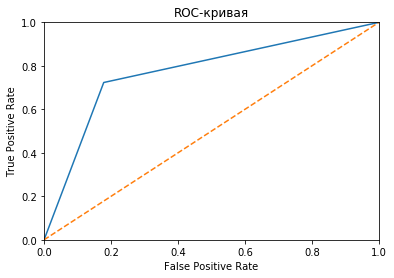

In [39]:
# Посмотрим на ROC кривую

fpr, tpr, thresholds = roc_curve(target_test, predicted_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Очень здорово, что построили кривую, ведь на графике метрика могла бы себя вести хуже чем сухой расчет.
    
Можно было бы разбавить график своими промежуточными выводами.
    
</div>

# Общий вывод

    1. Мы исследовали наши данные, отбросили лишние признаки и заполнили пропуски
    2. Также были обработаны категориальные признаки и стандартизированы числовые
    3. Мы исследовали различные модели на имеющемся наборе и столкнулись с проблемой дисбаланса, которая не позволила нам добиться необходимой полноты и точности
    4. Для решения проблемы мы попробовали
        - Выровнять вес классов
        - Добавить данных положительного класса
        - Убрать данные отрицательного класса
        - Применить комбинированный подход
    5. На основании нашего исследования мы выбрали и обучили лучшую модель. Это оказался случайный лес с количеством деревьев 20 и глубиной 10 при сбалансированном взвешивании классов.
    6. Нам удалось достичь необходимой F1-меры, она составила - 0.6007151
    7. Однако, дополнительно исследовав модель и изменив порог классификации, нам удалось добиться еще более впечатляющих результатов за счет увеличения полноты ценой снижения точности.
    
    Однако, мы помним, что нашей изначальной целью было именно своевременное прогнозирование оттока клиента и для данной задачи важна именно полнота, чтобы банк имел возможность предотвратить уход клиента, чтобы сэкономить деньги.
    
    В итоге, наша модель полностью отвечает как формальным, так и бизнес-требованиям.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
        
Успехов тебе в новых проектах! 
    
</div>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*